# Imports

In [1]:
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as  plt
import statistics
import random
import numpy as np
import copy
import math

# Section a

## Load digits dataset

In [3]:
# Load dataset
digits = load_digits(as_frame=True);

# Extract X and Y
X = digits.data;
Y = digits.target;
XY = X.merge(Y.to_frame(), left_index=True, right_index=True);

Show some data

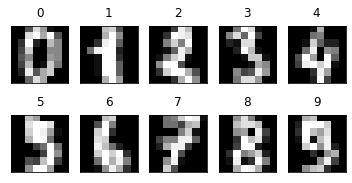

In [4]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3));
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([]);
    plt.title(digits.target[i]);
plt.show()

## Normalize data

In [5]:
transformer = Normalizer('max').fit(X);
X = transformer.transform(X);

## Divide into train and test

In [6]:
random_state = 10;
X_train, X_test = train_test_split(X, test_size=0.3, random_state=random_state);
XY_train, XY_test = train_test_split(XY, test_size=0.3, random_state=random_state);

# Section b

## Useful functions

In [7]:
def squareDiffMean(X,Y):
  total = 0;
  for idx,value in enumerate(X):
    total += statistics.mean(pow(value-Y[idx],2));
  return total/len(X);

def showImagesDiff(X,X_pred):
  nrows, ncols = 2, 10
  plt.figure(figsize=(10,2));
  plt.gray()
  for i in range(ncols):
      aux = math.floor((len(X)-1)*random.random() + 1);
      ax = plt.subplot(nrows, ncols, i + 1)
      ay = plt.subplot(nrows, ncols, i + ncols + 1)
      ax.matshow(X[aux,...].reshape((8, 8)))
      ay.matshow(X_pred[aux,...].reshape((8, 8)))
      ax.set_xticks([]); ax.set_yticks([]);
      ay.set_xticks([]); ay.set_yticks([]);
  plt.show()
  print("Original digits on top. Predictions at the bottom")

def plotScatter(X, title, vtitle):
  plt.figure()
  plt.scatter(X[:,0], X[:, 1], color='tab:gray', alpha=1., lw=2)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title(title)  
  plt.xlabel(vtitle + "1")
  plt.ylabel(vtitle + "2")
  plt.show()

def plot10clusters(X, y, title, vtitle):
  plt.figure()
  colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
  lw = 2
  for color, i, target_name in zip(colors, [0,1,2,3,4,5,6,7,8,9], digits.target_names):
      plt.scatter(X[y == i, 0], X[y == i, 1], marker='.', color=color, alpha=1., lw=lw,label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title(title)  
  plt.xlabel(vtitle + "1")
  plt.ylabel(vtitle + "2")
  plt.show()

## Define best epoch with linear

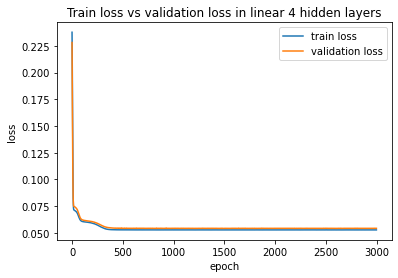

Layers:  4  Epoch:  3000  Batch:  100
Train error:  0.052772730587718225
Test error:  0.052033459614469015
Min loss:  0.052632346749305725
Min loss index:  2700
Min val loss:  0.054022178053855896
Min val loss index:  1479



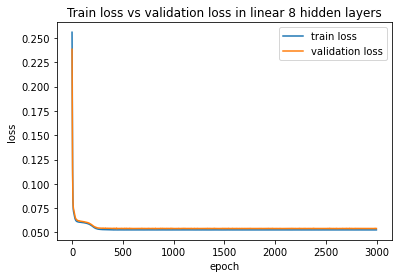

Layers:  8  Epoch:  3000  Batch:  100
Train error:  0.05277463214124241
Test error:  0.05204049551374895
Min loss:  0.052635423839092255
Min loss index:  2828
Min val loss:  0.05400652438402176
Min val loss index:  1337



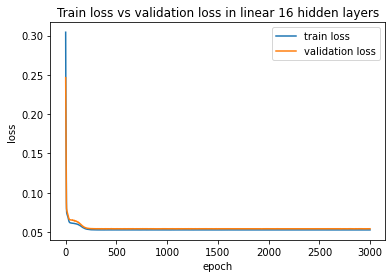

Layers:  16  Epoch:  3000  Batch:  100
Train error:  0.05277838303033713
Test error:  0.0520398477762385
Min loss:  0.052640173584222794
Min loss index:  2370
Min val loss:  0.05399438366293907
Min val loss index:  1141



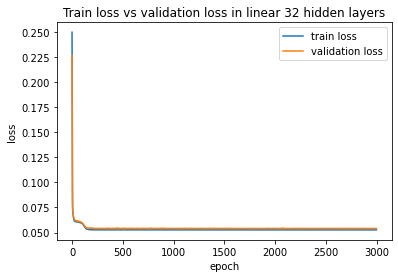

Layers:  32  Epoch:  3000  Batch:  100
Train error:  0.05277741725678761
Test error:  0.0520767370254022
Min loss:  0.052642278373241425
Min loss index:  2600
Min val loss:  0.054003648459911346
Min val loss index:  508



In [ ]:
sizesHiddenLayers = [4,8,16,32];
batch = 100;
epoch = 3000;
act = "linear";

trainErrors = [None]*len(sizesHiddenLayers);
testErrors = [None]*len(sizesHiddenLayers);

for i, sizeHidden in enumerate(sizesHiddenLayers):

  input = keras.Input(shape=(64,));
  encode = keras.layers.Dense(sizeHidden, activation=act)(input);
  encode = keras.layers.Dense( 2, activation=act)(encode);
  decode = keras.layers.Dense(sizeHidden, activation=act)(encode);
  decode = keras.layers.Dense(64, activation=act)(decode);
  autoencoder = keras.Model(input, decode);
  encoder = keras.Model(input, encode);
  autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
  h = autoencoder.fit(X_train, X_train, batch_size=batch, epochs=epoch, validation_split=0.1, verbose=False);
  loss = h.history['loss'];
  plt.plot(loss);
  val_loss = h.history['val_loss']
  plt.plot(val_loss);
  plt.title('Train loss vs validation loss in linear ' + str(sizeHidden) + ' hidden layers');
  plt.ylabel('loss');
  plt.xlabel('epoch');
  plt.legend(['train loss', 'validation loss'], loc='upper right');
  plt.savefig('linear'+sizeHidden+'.png',bbox_inches='tight')
  plt.show()

  X_trainPred = autoencoder.predict(X_train);
  trainError = squareDiffMean(X_trainPred,X_train);
  X_testPred = autoencoder.predict(X_test);
  testError = squareDiffMean(X_testPred,X_test);

  print("Layers: ",sizeHidden," Epoch: ",epoch," Batch: ",batch);
  print("Train error: ",trainError);
  print("Test error: ",testError);4
  print("Min loss: ", min(loss));
  print("Min loss index: ",loss.index(min(loss)));
  print("Min val loss: ", min(val_loss));
  print("Min val loss index: ",val_loss.index(min(val_loss)));
  print()

  trainErrors[i] = trainError;
  testErrors[i] = testError;

## Define best epoch with sigmoid

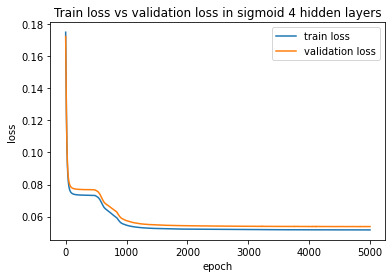

Layers:  4  Epoch:  5000  Batch:  100
Train error:  0.051954710156575934
Test error:  0.05139580628431597
Min loss:  0.05175100266933441
Min loss index:  4985
Min val loss:  0.05380287021398544
Min val loss index:  4740



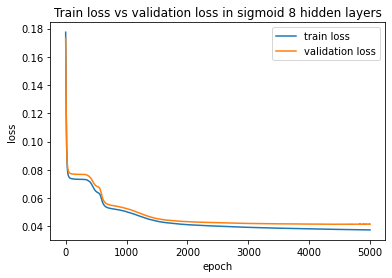

Layers:  8  Epoch:  5000  Batch:  100
Train error:  0.03791312915315991
Test error:  0.042433515116113124
Min loss:  0.03751739114522934
Min loss index:  4997
Min val loss:  0.04151122644543648
Min val loss index:  4897



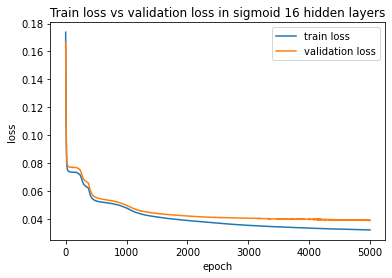

Layers:  16  Epoch:  5000  Batch:  100
Train error:  0.032710215719796445
Test error:  0.0376811052722413
Min loss:  0.0320325642824173
Min loss index:  4998
Min val loss:  0.038797780871391296
Min val loss index:  4991



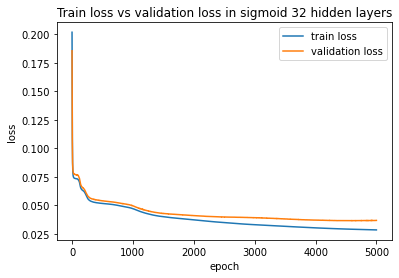

Layers:  32  Epoch:  5000  Batch:  100
Train error:  0.029315481451993836
Test error:  0.03614306077119175
Min loss:  0.028498820960521698
Min loss index:  4997
Min val loss:  0.03655446693301201
Min val loss index:  4553



In [ ]:
sizesHiddenLayers = [4,8,16,32];
batch = 100;
epoch = 5000;
act = "sigmoid";

trainErrors = [None]*len(sizesHiddenLayers);
testErrors = [None]*len(sizesHiddenLayers);

for i, sizeHidden in enumerate(sizesHiddenLayers):

  input = keras.Input(shape=(64,));
  encode = keras.layers.Dense(sizeHidden, activation=act)(input);
  encode = keras.layers.Dense( 2, activation=act)(encode);
  decode = keras.layers.Dense(sizeHidden, activation=act)(encode);
  decode = keras.layers.Dense(64, activation=act)(decode);
  autoencoder = keras.Model(input, decode);
  encoder = keras.Model(input, encode);
  autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
  h = autoencoder.fit(X_train, X_train, batch_size=batch, epochs=epoch, validation_split=0.1, verbose=False);
  loss = h.history['loss'];
  plt.plot(loss);
  val_loss = h.history['val_loss']
  plt.plot(val_loss);
  plt.title('Train loss vs validation loss in sigmoid ' + str(sizeHidden) + ' hidden layers');
  plt.ylabel('loss');
  plt.xlabel('epoch');
  plt.legend(['train loss', 'validation loss'], loc='upper right');
  plt.savefig('sigmoid'+sizeHidden+'.png',bbox_inches='tight')
  plt.show()

  X_trainPred = autoencoder.predict(X_train);
  trainError = squareDiffMean(X_trainPred,X_train);
  X_testPred = autoencoder.predict(X_test);
  testError = squareDiffMean(X_testPred,X_test);

  print("Layers: ",sizeHidden," Epoch: ",epoch," Batch: ",batch);
  print("Train error: ",trainError);
  print("Test error: ",testError);
  print("Min loss: ", min(loss));
  print("Min loss index: ",loss.index(min(loss)));
  print("Min val loss: ", min(val_loss));
  print("Min val loss index: ",val_loss.index(min(val_loss)));
  print()

  trainErrors[i] = trainError;
  testErrors[i] = testError;

## Define best epoch with relu

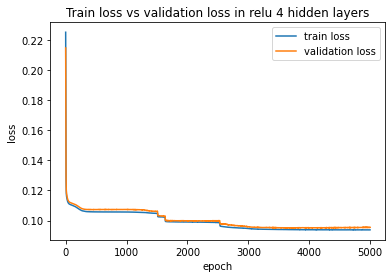

Layers:  4  Epoch:  5000  Batch:  100
Train error:  0.09400463644864583
Test error:  0.09391312384190159
Min loss:  0.0938287079334259
Min loss index:  4951
Min val loss:  0.09508892148733139
Min val loss index:  3745



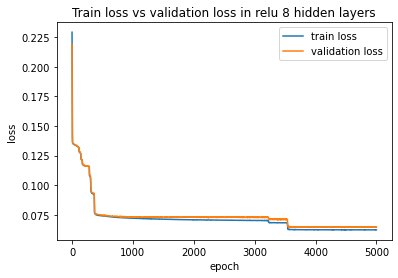

Layers:  8  Epoch:  5000  Batch:  100
Train error:  0.062395405251760364
Test error:  0.06328837454047176
Min loss:  0.06216044723987579
Min loss index:  4956
Min val loss:  0.06430409103631973
Min val loss index:  4474



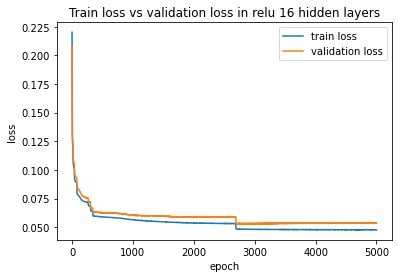

Layers:  16  Epoch:  5000  Batch:  100
Train error:  0.04826883995182507
Test error:  0.05020828405105334
Min loss:  0.04772869497537613
Min loss index:  4999
Min val loss:  0.05300537124276161
Min val loss index:  2879



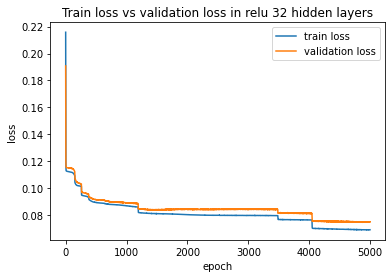

Layers:  32  Epoch:  5000  Batch:  100
Train error:  0.06956405872120297
Test error:  0.07219332065372525
Min loss:  0.06900878250598907
Min loss index:  4988
Min val loss:  0.0746167004108429
Min val loss index:  4877



In [ ]:
sizesHiddenLayers = [4,8,16,32];
batch = 100;
epoch = 5000;
act = "relu";

trainErrors = [None]*len(sizesHiddenLayers);
testErrors = [None]*len(sizesHiddenLayers);

for i, sizeHidden in enumerate(sizesHiddenLayers):

  input = keras.Input(shape=(64,));
  encode = keras.layers.Dense(sizeHidden, activation=act)(input);
  encode = keras.layers.Dense( 2, activation=act)(encode);
  decode = keras.layers.Dense(sizeHidden, activation=act)(encode);
  decode = keras.layers.Dense(64, activation=act)(decode);
  autoencoder = keras.Model(input, decode);
  encoder = keras.Model(input, encode);
  autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
  h = autoencoder.fit(X_train, X_train, batch_size=batch, epochs=epoch, validation_split=0.1, verbose=False);
  loss = h.history['loss'];
  plt.plot(loss);
  val_loss = h.history['val_loss']
  plt.plot(val_loss);
  plt.title('Train loss vs validation loss in relu ' + str(sizeHidden) + ' hidden layers');
  plt.ylabel('loss');
  plt.xlabel('epoch');
  plt.legend(['train loss', 'validation loss'], loc='upper right');
  #plt.savefig("relu"+sizeHidden+".png",bbox_inches='tight')
  plt.show()

  X_trainPred = autoencoder.predict(X_train);
  trainError = squareDiffMean(X_trainPred,X_train);
  X_testPred = autoencoder.predict(X_test);
  testError = squareDiffMean(X_testPred,X_test);

  print("Layers: ",sizeHidden," Epoch: ",epoch," Batch: ",batch);
  print("Train error: ",trainError);
  print("Test error: ",testError);
  print("Min loss: ", min(loss));
  print("Min loss index: ",loss.index(min(loss)));
  print("Min val loss: ", min(val_loss));
  print("Min val loss index: ",val_loss.index(min(val_loss)));
  print()

  trainErrors[i] = trainError;
  testErrors[i] = testError;

## Linear best network test

In [ ]:
act = "linear";
layers = 16;
epochs = 1141; # 1141 is the best number of epcohs

input = keras.Input(shape=(64,));
encode = keras.layers.Dense(layers, activation=act)(input);
encode = keras.layers.Dense(2, activation=act)(encode);
decode = keras.layers.Dense(layers, activation=act)(encode);
decode = keras.layers.Dense(64, activation=act)(decode);
autoencoderL = keras.Model(input, decode);
encoderL = keras.Model(input, encode);

autoencoderL.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
autoencoderL.fit(X_train, X_train, batch_size=100, epochs=epochs, verbose=False);

X_trainPred = autoencoderL.predict(X_train);
trainError = squareDiffMean(X_trainPred,X_train)
print("Train error: ",trainError)

X_testPred = autoencoderL.predict(X_test);
testError = squareDiffMean(X_testPred,X_test)
print("Test error: ",testError)

Train error:  0.052763554497955216
Test error:  0.052005989352736204


Show some predictions

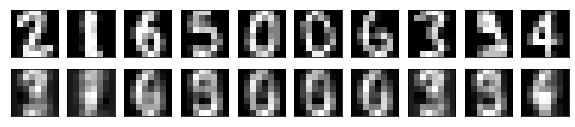

Original digits on top. Predictions at the bottom


In [ ]:
showImagesDiff(X_test,X_testPred)

## Sigmoid best network test

In [ ]:
act = "sigmoid";
layers = 32;
epochs = 4553; # 4553 is the best number of epcohs

input = keras.Input(shape=(64,));
encode = keras.layers.Dense(layers, activation=act)(input);
encode = keras.layers.Dense( 2, activation=act)(encode);
decode = keras.layers.Dense(layers, activation=act)(encode);
decode = keras.layers.Dense(64, activation=act)(decode);
autoencoderS = keras.Model(input, decode);
encoderS = keras.Model(input, encode);

autoencoderS.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
autoencoderS.fit(X_train, X_train, batch_size=100, epochs=epochs, verbose=False);

X_trainPred = autoencoderS.predict(X_train);
trainError = squareDiffMean(X_trainPred,X_train)
print("Train error: ",trainError)

X_testPred = autoencoderS.predict(X_test);
testError = squareDiffMean(X_testPred,X_test)
print("Test error: ",testError)

Train error:  0.029628612916783897
Test error:  0.03595083352455181


Show some predictions

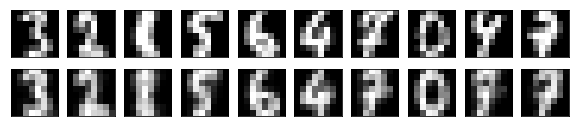

Original digits on top. Predictions at the bottom


In [ ]:
showImagesDiff(X_test,X_testPred)

## Relu best network test

In [ ]:
act = "relu";
layers = 16;
epochs = 2879; # 2879 is the best number of epcohs

input = keras.Input(shape=(64,));
encode = keras.layers.Dense(layers, activation=act)(input);
encode = keras.layers.Dense( 2, activation=act)(encode);
decode = keras.layers.Dense(layers, activation=act)(encode);
decode = keras.layers.Dense(64, activation=act)(decode);
autoencoderR = keras.Model(input, decode);
encoderR = keras.Model(input, encode);

autoencoderR.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
autoencoderR.fit(X_train, X_train, batch_size=100, epochs=epochs, verbose=False);

X_trainPred = autoencoderR.predict(X_train);
trainError = squareDiffMean(X_trainPred,X_train)
print("Train error: ",trainError)

X_testPred = autoencoderR.predict(X_test);
testError = squareDiffMean(X_testPred,X_test)
print("Test error: ",testError)

Train error:  0.0516911310799341
Test error:  0.05411680776968633


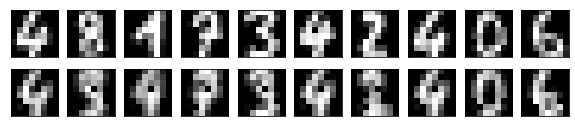

Original digits on top. Predictions at the bottom


In [ ]:
showImagesDiff(X_test,X_testPred)

## Encoding and PCA

PCA

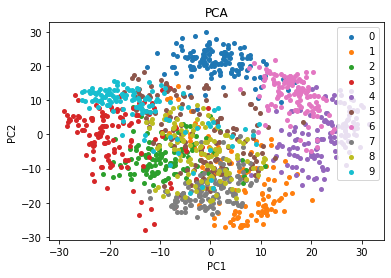

In [ ]:
pca = PCA()
pca_transformed = pca.fit_transform(XY_train)
plot10clusters(pca_transformed[:,:2], XY_train['target'], 'PCA', 'PC')  

Linear

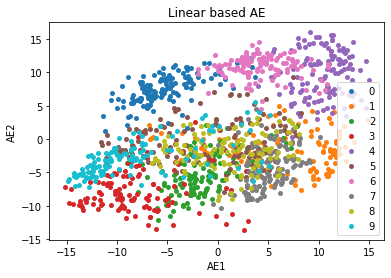

In [ ]:
encodedL_data = encoderL.predict(XY_train.drop(['target'],axis=1))
plot10clusters(encodedL_data[:,:2], XY_train['target'],'Linear based AE', 'AE')  

Sigmoid

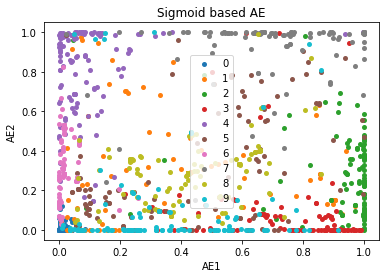

In [ ]:
encodedL_data = encoderS.predict(XY_train.drop(['target'],axis=1))
plot10clusters(encodedL_data[:,:2], XY_train['target'],'Sigmoid based AE', 'AE')  

Relu

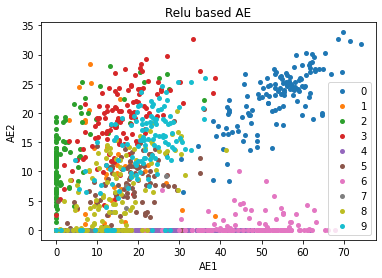

In [ ]:
encodedL_data = encoderR.predict(XY_train.drop(['target'],axis=1))
plot10clusters(encodedL_data[:,:2], XY_train['target'],'Relu based AE', 'AE')  

# Section c

## Create datasets

In [ ]:
Xcorrupted10percent = [] 
Xcorrupted30percent = [] 
for index, val in enumerate(X):

  # Generating 10% corrupted dataset
  Xcorrupted10percent.append(copy.deepcopy(val))
  Xcorrupted10Pixels = random.sample(range(0, 64), round(0.1*64));
  for i,pixel in enumerate(Xcorrupted10Pixels):
    Xcorrupted10percent[index][pixel] = np.random.uniform(low=0, high=1);

  # Generating 30% corrupted dataset
  Xcorrupted30percent.append(copy.deepcopy(val))
  Xcorrupted30Pixels = random.sample(range(0, 64), round(0.3*64));
  for i,pixel in enumerate(Xcorrupted30Pixels):
    Xcorrupted30percent[index][pixel] = np.random.uniform(low=0, high=1);

Xcorrupted10percent = np.array(Xcorrupted10percent)
Xcorrupted30percent = np.array(Xcorrupted30percent)

X_train_corrupted10percent, X_test_corrupted10percent = train_test_split(Xcorrupted10percent, test_size=0.3, random_state=random_state);
X_train_corrupted30percent, X_test_corrupted30percent = train_test_split(Xcorrupted30percent, test_size=0.3, random_state=random_state);

Let's see if we notice the corruption 

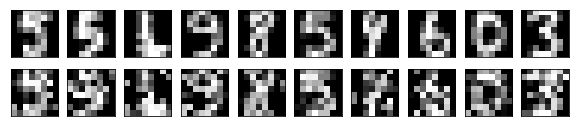

Original digits on top. Predictions at the bottom


In [ ]:
showImagesDiff(X_test, X_test_corrupted30percent)

## a)


### 10%

Create and fit network

In [ ]:
act = "sigmoid";
input = keras.Input(shape=(64,));
encode = keras.layers.Dense(32, activation=act)(input);
encode = keras.layers.Dense( 2, activation=act)(encode);
decode = keras.layers.Dense(32, activation=act)(encode);
decode = keras.layers.Dense(64, activation=act)(decode);
autoencoder = keras.Model(input, decode);
encoder = keras.Model(input, encode);

autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
autoencoder.fit(X_train_corrupted10percent, X_train, batch_size=100, epochs=4553, verbose=False);

Compute error

In [ ]:
X_trainPred = autoencoder.predict(X_train_corrupted10percent);
trainError = squareDiffMean(X_trainPred,X_train)
print("Train error: ",trainError)

X_testPred = autoencoder.predict(X_test_corrupted10percent);
testError = squareDiffMean(X_testPred,X_test)
print("Test error: ",testError)

Train error:  0.030099431581094065
Test error:  0.05049267886415348


Show predictions

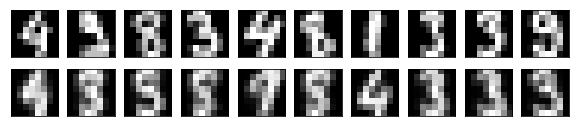

Original digits on top. Predictions at the bottom


In [ ]:
showImagesDiff(X_test,X_testPred)

### 30%

Create and fit network

In [ ]:
act = "sigmoid";
input = keras.Input(shape=(64,));
encode = keras.layers.Dense(32, activation=act)(input);
encode = keras.layers.Dense( 2, activation=act)(encode);
decode = keras.layers.Dense(32, activation=act)(encode);
decode = keras.layers.Dense(64, activation=act)(decode);
autoencoder = keras.Model(input, decode);
encoder = keras.Model(input, encode);

autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
autoencoder.fit(X_train_corrupted30percent, X_train, batch_size=100, epochs=4553, verbose=False);

Compute error

In [ ]:
X_trainPred = autoencoder.predict(X_train_corrupted30percent);
trainError = squareDiffMean(X_trainPred,X_train)
print("Train error: ",trainError)

X_testPred = autoencoder.predict(X_test_corrupted30percent);
testError = squareDiffMean(X_testPred,X_test)
print("Test error: ",testError)

Train error:  0.030796835595936062
Test error:  0.06598214128816134


Show predictions

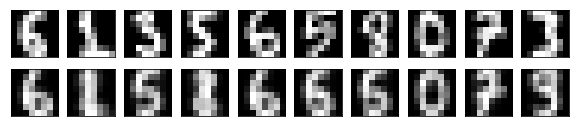

Original digits on top. Predictions at the bottom


In [ ]:
showImagesDiff(X_test,X_testPred)

## b)

### Create double datasets

In [8]:
doubleX = []
doubleY = []
doubleXcorrupted10percent = [] 
doubleXcorrupted30percent = [] 
for i in range(2):
  for index, val in enumerate(X):
    doubleX.append(val)
    doubleY.append(Y[index])
    # Generating 10% corrupted dataset
    doubleXcorrupted10percent.append(copy.deepcopy(val))
    Xcorrupted10Pixels = random.sample(range(0, 64), round(0.1*64));
    for i,pixel in enumerate(Xcorrupted10Pixels):
      doubleXcorrupted10percent[index][pixel] = np.random.uniform(low=0, high=1);

    # Generating 30% corrupted dataset
    doubleXcorrupted30percent.append(copy.deepcopy(val))
    Xcorrupted30Pixels = random.sample(range(0, 64), round(0.3*64));
    for i,pixel in enumerate(Xcorrupted30Pixels):
      doubleXcorrupted30percent[index][pixel] = np.random.uniform(low=0, high=1);

doubleX = np.array(doubleX)
doubleY = np.array(doubleY)
doubleXcorrupted10percent = np.array(doubleXcorrupted10percent)
doubleXcorrupted30percent = np.array(doubleXcorrupted30percent)

doubleY_train, doubleY_test = train_test_split(doubleY, test_size=0.3, random_state=random_state);
doubleX_train, doubleX_test = train_test_split(doubleX, test_size=0.3, random_state=random_state);
doubleX_train_corrupted10percent, doubleX_test_corrupted10percent = train_test_split(doubleXcorrupted10percent, test_size=0.3, random_state=random_state);
doubleX_train_corrupted30percent, doubleX_test_corrupted30percent = train_test_split(doubleXcorrupted30percent, test_size=0.3, random_state=random_state);

### 10%

Create and fit network

In [9]:
act = "sigmoid";
input = keras.Input(shape=(64,));
encode = keras.layers.Dense(32, activation=act)(input);
encode = keras.layers.Dense( 2, activation=act)(encode);
decode = keras.layers.Dense(32, activation=act)(encode);
decode = keras.layers.Dense(64, activation=act)(decode);
autoencoderDoble10 = keras.Model(input, decode);
encoderDoble10 = keras.Model(input, encode);

autoencoderDoble10.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
autoencoderDoble10.fit(doubleX_train_corrupted10percent, doubleX_train, batch_size=100, epochs=4553, verbose=False);

Compute error

In [ ]:
X_trainPred = autoencoderDoble10.predict(doubleX_train_corrupted10percent);
trainError = squareDiffMean(X_trainPred,doubleX_train)
print("Train error: ",trainError)

X_testPred = autoencoderDoble10.predict(doubleX_test_corrupted10percent);
testError = squareDiffMean(X_testPred,doubleX_test)
print("Test error: ",testError)

Train error:  0.028417169248334425
Test error:  0.042894502695943


Show predictions

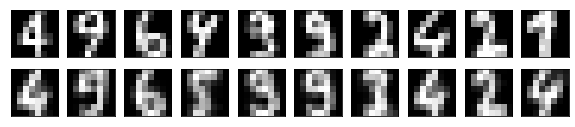

Original digits on top. Predictions at the bottom


In [ ]:
showImagesDiff(doubleX_test,X_testPred)

### 30%

Create and fit network

In [10]:
act = "sigmoid";
input = keras.Input(shape=(64,));
encode = keras.layers.Dense(32, activation=act)(input);
encode = keras.layers.Dense( 2, activation=act)(encode);
decode = keras.layers.Dense(32, activation=act)(encode);
decode = keras.layers.Dense(64, activation=act)(decode);
autoencoderDoble30 = keras.Model(input, decode);
encoderDoble30 = keras.Model(input, encode);

autoencoderDoble30.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError());
autoencoderDoble30.fit(doubleX_train_corrupted30percent, doubleX_train, batch_size=100, epochs=4553, verbose=False);

Compute error

In [ ]:
X_trainPred = autoencoderDoble30.predict(doubleX_train_corrupted30percent);
trainError = squareDiffMean(doubleX_train,X_trainPred)
print("Train error: ",trainError)

X_testPred = autoencoderDoble30.predict(doubleX_test_corrupted30percent);
testError = squareDiffMean(doubleX_test,X_testPred)
print("Test error: ",testError)

Train error:  0.031216454334344505
Test error:  0.06039004359491136


Show predictions

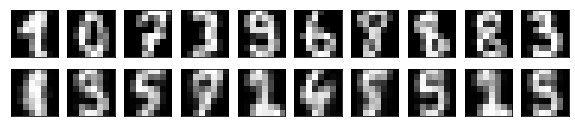

Original digits on top. Predictions at the bottom


In [ ]:
showImagesDiff(doubleX_test,X_testPred)

## c)

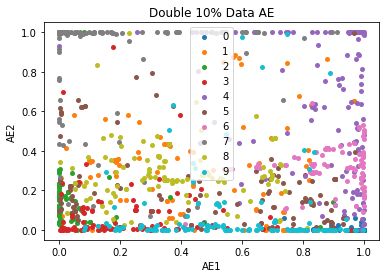

In [11]:
encodedL_data = encoderDoble10.predict(XY_train.drop(['target'],axis=1))
plot10clusters(encodedL_data[:,:2], XY_train['target'],'Double 10% Data AE', 'AE')

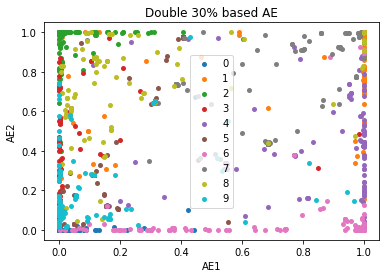

In [12]:
encodedL_data = encoderDoble30.predict(XY_train.drop(['target'],axis=1))
plot10clusters(encodedL_data[:,:2], XY_train['target'],'Double 30% based AE', 'AE')